In [344]:
import pandas as pd
import tweepy
import requests
import os
import time
import json
import re
import numpy as np
from IPython.display import Image
from functools import reduce
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]
import seaborn as sns

## 1. Gather Data

In [2]:

#keys were deleted form this notebook for security

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:

if not os.path.exists('dog_pics'):
    os.makedirs('dog_pics')
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response.content

with open(os.path.join('dog_pics', url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
os.listdir('dog_pics')

['image-predictions.tsv']

In [4]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
pics = pd.read_csv('dog_pics/image-predictions.tsv',sep = '\t')
pics.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [ ]:
tweet = api.get_status('892420643555336193')
print(tweet.text)

Rate limit reached. Sleeping for: 407


In [8]:
# query the Twitter API for each tweet's JSON text
#Reference:https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

start = time.time() # start timer

with open('getstatus_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))

1# 892420643555336193


Rate limit reached. Sleeping for: 62


2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 884441805382717440
43# 8842478788

319# 834574053763584002
320# 834477809192075265
321# 834458053273591808
322# 834209720923721728
323# 834167344700198914
324# 834089966724603904
325# 834086379323871233
326# 833863086058651648
327# 833826103416520705
328# 833732339549220864
329# 833722901757046785
330# 833479644947025920
331# 833124694597443584
332# 832998151111966721
333# 832769181346996225
334# 832757312314028032
335# 832682457690300417
336# 832645525019123713
337# 832636094638288896
338# 832397543355072512
339# 832369877331693569
340# 832273440279240704
341# 832215909146226688
342# 832215726631055365
343# 832088576586297345
344# 832040443403784192
345# 832032802820481025
346# 831939777352105988
347# 831926988323639298
348# 831911600680497154
349# 831670449226514432
350# 831650051525054464
351# 831552930092285952
352# 831322785565769729
353# 831315979191906304
354# 831309418084069378
355# 831262627380748289
356# 830956169170665475
357# 830583320585068544
358# 830173239259324417
359# 830097400375152640
360# 82987898203

652# 792773781206999040
653# 792394556390137856
654# 792050063153438720
655# 791821351946420224
656# 791784077045166082
657# 791780927877898241
658# 791774931465953280
659# 791672322847637504
660# 791406955684368384
661# 791312159183634433
662# 791026214425268224
663# 790987426131050500
664# 790946055508652032
665# 790723298204217344
666# 790698755171364864
667# 790581949425475584
668# 790337589677002753
669# 790277117346975746
670# 790227638568808452
671# 789986466051088384
672# 789960241177853952
673# 789903600034189313
674# 789628658055020548
675# 789599242079838210
676# 789530877013393408
677# 789314372632018944
678# 789280767834746880
679# 789268448748703744
680# 789137962068021249
681# 788908386943430656
682# 788765914992902144
683# 788552643979468800
684# 788412144018661376
685# 788178268662984705
686# 788150585577050112
687# 788070120937619456
688# 788039637453406209
689# 787810552592695296
690# 787717603741622272
691# 787397959788929025
692# 787322443945877504
693# 78711194249

Rate limit reached. Sleeping for: 676


901# 758740312047005698


AttributeError: 'NoneType' object has no attribute 'json'

In [9]:
# list of dictionaries to read tweet's JSON data line by line to later convert to a dataframe
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# create a dataframe with tweet ID
twitter_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [10]:
twitter_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7980,37248,"[0, 85]"
1,892177421306343426,5926,32028,"[0, 138]"
2,891815181378084864,3913,24132,"[0, 121]"
3,891689557279858688,8135,40574,"[0, 79]"
4,891327558926688256,8813,38800,"[0, 138]"


## 2. Assess Data

### Visual Assessing

In [11]:
#Dataset from WeRateDogs Twitter archive
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
#Dataset of the tweet image prediction
pics

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
#Dataset of tweets from Twitter API
twitter_df

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7980,37248,"[0, 85]"
1,892177421306343426,5926,32028,"[0, 138]"
2,891815181378084864,3913,24132,"[0, 121]"
3,891689557279858688,8135,40574,"[0, 79]"
4,891327558926688256,8813,38800,"[0, 138]"
5,891087950875897856,2932,19495,"[0, 138]"
6,890971913173991426,1945,11382,"[0, 140]"
7,890729181411237888,17778,62847,"[0, 118]"
8,890609185150312448,4032,26822,"[0, 122]"
9,890240255349198849,6944,30726,"[0, 133]"


### Programmatic assesment

#### Dataset from WeRateDogs Twitter archive

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
sum(df.tweet_id.duplicated())

0

In [16]:
sum(df.timestamp.duplicated())

0

In [17]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
df.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [20]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
df.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Buddy            7
Toby             7
Bailey           7
Daisy            7
an               7
Jax              6
Koda             6
Scout            6
Rusty            6
Dave             6
Oscar            6
Bella            6
Jack             6
Milo             6
Leo              6
Stanley          6
Oakley           5
              ... 
Dug              1
Willow           1
Fiji             1
Jomathan         1
Flurpson         1
Clarkus          1
JD               1
Willem           1
Stefan           1
Autumn           1
Tess             1
Bowie            1
Ralph            1
Snicku           1
Enchilada        1
Jett             1
his              1
Dook             1
Charleson        1
Shakespeare      1
Orion            1
Mac         

In [23]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [25]:
df.tweet_id.duplicated().sum()

0

#### Dataset of the tweet image prediction

In [26]:
pics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
pics.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [59]:
pics.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [29]:
# number of pictures that are same because they come from same source, same link 
sum(pics.jpg_url.duplicated())

66

In [30]:
pics.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [31]:
pics.tweet_id.duplicated().sum()

0

For a closer examination of data I have set up few cells for myself to be able to plug a tweet id into and check different information about it. I found it to be useful. Here for example I checked the details of a tweet with numirator of 84 and denominator of 70. And it looks like this rating is udjusted for several dogs that are on a picture. It is also fun and exciting to be able to see some of the tweet pictures as I investigate the dataset.  

In [204]:
#check the row for individual id
pics.query('tweet_id == "820690176645140481"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.0374,True


In [232]:
#check the tweet text for individual id from archive dataset
text = df.query('tweet_id == "786709082849828864"').text.values[0]
text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [202]:
#get the picture url and show the picture 
image = pics.query('tweet_id == "820690176645140481"').jpg_url.values[0]
image

'https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg'

In [203]:
#using python HTML functionalities to show the image
Image(url= image, width=200, height=400)

#### Dataset of tweets and likes from Twitter API

In [36]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 4 columns):
tweet_id              879 non-null int64
retweet_count         879 non-null int64
favorite_count        879 non-null int64
display_text_range    879 non-null object
dtypes: int64(3), object(1)
memory usage: 27.5+ KB


In [37]:
twitter_df.tweet_id.duplicated().sum()

0

In [38]:
twitter_df.describe()

,tweet_id,retweet_count,favorite_count
count,8.790000e+02,879.000000,879.000000
mean,8.199614e+17,4921.011377,14215.594994
std,3.698249e+16,5553.090574,14971.060313
min,7.588287e+17,1.000000,0.000000
25%,7.892976e+17,2036.000000,5389.000000
50%,8.183075e+17,3357.000000,10857.000000
75%,8.482129e+17,5752.000000,19936.000000
max,8.924206e+17,58730.000000,137216.000000


### Quality

- The WeRateDogs archive dataset contains retweets and therefore - duplicated tweets.
- Some tweets are responses to the original tweets. Those do not have pictures and are reference one of already existing tweets.
- Some names of dogs in the WeRateDogs archive dataset are missing, having None value. Some names are represented as articles “a”, “an”, “the” or other words.
- Datatype for columns “tweet_id” is represented as integer, more appropriate datatype is string.
- Datatype for “timestamp” is string/object, more appropriate data type is date/time object.
- The scores(numerator and denominator columns) for tweets id 682962037429899265, 666287406224695296 and 740373189193256964, 810984652412424192 are wrong because in the tweet text 9/11 and 7/11, and 3 1/2, 24/7 appeared before the score numbers, which were just a part of the sentance - not a score. 
- Some tweets are containing decimal numbers for numerators but only the part after decimal point was translated to the dataset as a numerator.
- Some denominators in the WeRateDogs archive dataset are more then 10.
- The image prediction dataset has 66 duplicated image urls, therefore are same images.  
- Breed names in the image prediction dataset represented inconsistently. Some start with an upper case letter, others with lower case.

### Tidiness
- The "in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" columns in the WeRateDog archive will be unnecessary after quality cleaning 
- The image prediction table has several columns with breed prediction of different confidence level. Some of the predictions are not even names of breeds. 
- Data for this analysis is presented in 3 different tables.
- The "display_text_range" column of the Twitter API table contains some metadata about the tweet text wich I dont find useful.
- Separate columns for categorical data of dog stages "doggo", "puppo", "pupper", "floofer".

## Clean Data

### WeRateDogs archive dataset

In [39]:
# Create the copy of the dataset for cleaning 
df_archive_clean = df.copy()

### Quality

#### Define
> The WeRateDogs archive dataset contains retweets and therefore - duplicated tweets. 
Create a new dataset containing only original tweets, omitting the duplicated retweetted instances using isnull() method.

#### Code

In [40]:
#separate data frame where "retweeted_status_id" has null values
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test

In [41]:
len(df_archive_clean[df_archive_clean.retweeted_status_id.isnull() == False])

0

#### Define
> Some tweets are responces to the original tweets. Those do not have pictures and are reference one of already existing tweets. I will separate these tweet ids from the clean dataset, by selecting them using isnull() method applied to "in_reply_to_user_id" column.

#### Code

In [100]:
#here are the data frame with all replies, 
#we can see that "in_reply_to_user_id" and "in_reply_to_status_id" are not empty 

df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,nameless,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,nameless,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,nameless,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,nameless,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,nameless,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,nameless,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,nameless,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,nameless,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,nameless,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,nameless,None,None,None,None


In [101]:
#separate the data frame where "in_reply_to_user_id" has null values
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()]

#### Test

In [102]:
len(df_archive_clean[df_archive_clean.in_reply_to_user_id.isnull()==False])

0

#### Define
>Dog names are missing or represented by random words. Replace all values wich are not names with "namless" word. I will use regular expressions combined with method srt() and match() to find incorrect names in the "name" column.

#### Code

In [42]:
#match and replace all name values that are None or start with lower letter 
df_archive_clean['name'][df_archive_clean['name'].str.match('None|[a-z]+')] = 'nameless'

#### Test

In [43]:
df_archive_clean.name.value_counts()

nameless     784
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Bailey         6
Bella          6
Jax            6
Bo             6
Stanley        6
Oscar          6
Koda           6
Bentley        5
Buddy          5
Louis          5
Leo            5
Milo           5
Chester        5
Rusty          5
Scout          5
Dave           5
Maggie         4
Reggie         4
            ... 
Al             1
Tanner         1
Tayzie         1
Stark          1
Mac            1
Charleson      1
Spanky         1
Dook           1
Timison        1
Monster        1
Bell           1
Trevith        1
Tommy          1
Halo           1
Bayley         1
Nollie         1
Jazz           1
Mimosa         1
Bert           1
Colin          1
Lillie         1
Sailor         1
Autumn         1
Tess           1
Bowie          1
Ralph          1
Snicku         1
Enchilada     

#### Define

>Datatype for columns “tweet_id” is represented as integer. I shall convert it into a string datatype, using method astype().

#### Code

In [44]:
#convert tweet_id to object type
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)

#### Test

In [45]:
df_archive_clean.tweet_id.dtypes

dtype('O')

#### Define

>Datatype for “timestamp” is string/object. Convert it to date/time object insted. The to_datetime() method from pandas should work here.

#### Code

In [46]:
#convert timestamp to date/time type
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [47]:
df_archive_clean.timestamp.dtypes

datetime64[ns, UTC]

#### Define

>Scores(numerator and denominator columns) for tweets id 682962037429899265, 666287406224695296 and 740373189193256964, 810984652412424192 are wrong because in the tweet text 9/11 and 7/11, and 3 1/2, 24/7 appeared before the score numbers, which were just a part of the sentance - not a score. I will manually replace those tweet scores. 

>I decided to add images to this part for better effect.

#### Code

In [105]:
#dataframe representing tweet ids in question
df_archive_clean.query('rating_denominator < 20').query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,nameless,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,nameless,None,None,None,None


#### 1. Tweet id 810984652412424192, row 516

In [138]:
#shows image based on tweet id 
image = pics.query('tweet_id == "810984652412424192"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [106]:
#investigate text of the tweet 
text = df.query('tweet_id == "810984652412424192"').text.values[0]
text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

>As we see from the closer look in the text, there was no score given to Sam. So that Sam does not feel sad, I will give him the score 10/10. 

In [124]:
#using .loc method with number of the row and the column name  
df_archive_clean.loc[516,'rating_numerator'] = 10

In [120]:
df_archive_clean.loc[516, 'rating_denominator'] = 10

#### Test 1. 

In [121]:
df_archive_clean.query('tweet_id == "810984652412424192"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",10,10,Sam,None,None,None,None


#### 2. Tweet id 740373189193256964, row 1068

In [139]:
#shows image based on tweet id
image = pics.query('tweet_id == "740373189193256964"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [123]:
#investigate text of the tweet 
text = df.query('tweet_id == "740373189193256964"').text.values[0]
text

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [131]:
df_archive_clean.loc[1068,'rating_numerator'] = 14
df_archive_clean.loc[1068, 'rating_denominator'] = 10

#### Test 2.

In [127]:
df_archive_clean.query('tweet_id == "740373189193256964"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,nameless,None,None,None,None


#### 3. Tweet id 682962037429899265, row 1662

In [141]:
#shows image based on tweet id
image = pics.query('tweet_id == "682962037429899265"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [129]:
#investigate text of the tweet 
text = df.query('tweet_id == "682962037429899265"').text.values[0]
text

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [132]:
df_archive_clean.loc[1662,'rating_numerator'] = 10
df_archive_clean.loc[1662, 'rating_denominator'] = 10

#### Test 3.

In [133]:
df_archive_clean.query('tweet_id == "682962037429899265"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None


#### 4. Tweet id 666287406224695296, row 2335

In [140]:
#shows image based on tweet id
image = pics.query('tweet_id == "666287406224695296"').jpg_url.values[0]
Image(url= image, width=200, height=400)

In [134]:
#investigate text of the tweet 
text = df.query('tweet_id == "666287406224695296"').text.values[0]
text

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [135]:
df_archive_clean.loc[2335,'rating_numerator'] = 9
df_archive_clean.loc[2335, 'rating_denominator'] = 10

#### Test 4.

In [136]:
df_archive_clean.query('tweet_id == "666287406224695296"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,nameless,None,None,None,None


#### Test total
> After adjusting tweet ratings above we can see that there are no denominators left that are less then 10 or are odd numbers. 

In [249]:
df_archive_clean.rating_denominator.value_counts()


10     2084
50        3
80        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
Name: rating_denominator, dtype: int64

#### Define
> Some tweets are containing decimal numbers for numerators but only the part after decimal point was translated to the dataset as a numerator. This causing an incorrect values fot ratings. I will manually adjust the numerator for these tweet to correct the ratings for each of such cases using iloc. 

#### Code

In [275]:
#find all instances of desimal values for rating
with pd.option_context('max_colwidth', 200):
    display(df_archive_clean[df_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][[ 'text']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [276]:
#adjust the numerators
df_archive_clean.loc[45,'rating_numerator'] = 13.5
df_archive_clean.loc[695,'rating_numerator'] = 9.75
df_archive_clean.loc[763,'rating_numerator'] = 11.27
df_archive_clean.loc[1712,'rating_numerator'] = 11.26


#### Test

In [277]:
display(df_archive_clean[df_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][[ 'text', 'rating_numerator']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,Here we have uncovered an entire battalion of ...,11.26


#### Define
> Some denominators in the WeRateDogs archive dataset are more then 10. The assesment part of this dataset showed that denominators that are more then 10 are such because the tweets are about multiple dogs. The pictures attached to these tweets include several dogs, therefore the score is forall of them. To resolve this issue, I decided to make a separate column called "rating". I would divide numerator by denominator and multiply by 10 to get a uniform rating for the whole dataset. 

#### Code

In [278]:
#after the calculating use astype() to store the result to float type
df_archive_clean['rating'] = 10 * df_archive_clean['rating_numerator'] / df_archive_clean['rating_denominator'].astype(float)

#### Test

In [279]:
#sample of denominators over 10 to check how new rating was applied
df_archive_clean.query('rating_denominator > 10').sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
1351,704054845121142784,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50,nameless,12.0,None
1843,675853064436391936,2015-12-13 01:41:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88.0,80,nameless,11.0,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.0,170,nameless,12.0,None
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165.0,150,nameless,11.0,None
1433,697463031882764288,2016-02-10 16:51:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44.0,40,nameless,11.0,None
1635,684222868335505415,2016-01-05 04:00:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110,nameless,11.0,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,10.0,None
1254,710658690886586372,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80.0,80,nameless,10.0,None
1274,709198395643068416,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50,nameless,9.0,None
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84.0,70,nameless,12.0,None


After adjusting the rating and assessing the dataset using the describe() method. I've noticed strange rating that stood out as max of 1776. After the closer investigation I found that it is indeed a correct numerator, referensing the significant year in US history.

In [280]:
df_archive_clean.rating.describe()

count    2097.000000
mean       11.645103
std        39.628850
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [250]:
df_archive_clean.query('rating == "1776"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,1776.0,None


In [254]:
top_rating = pics.query('tweet_id == "749981277374128128"').jpg_url.values[0]
Image(url= top_rating, width=200, height=400)

#### Define 
>The image prediction dataset has 66 duplicated image urls, therefore are same images. I will drop rows with duplicated images using duplicated() functionality of pandas.

In [145]:
#but first, make copy of the image prediction dataset
pics_clean = pics.copy()

#### Code

In [146]:
pics_clean = pics_clean. (subset=['jpg_url'], keep='last')

#### Test

In [147]:
sum(pics_clean['jpg_url'].duplicated())

0

#### Define 
>Breed names in the image prediction dataset represented inconsistently. Some start with an upper case letter, others with lower case. I will apply str() and lower() method to all columns containing bread names.

#### Code

In [152]:
#sample for referense to minimize scrolling
pics.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [149]:
#use lower() method on all columns containing breed names 
pics_clean['p1'] = pics_clean['p1'].str.lower()
pics_clean['p2'] = pics_clean['p2'].str.lower()
pics_clean['p3'] = pics_clean['p3'].str.lower()

#### Test

In [153]:
#same sample for reference, to show that breed names start with lower case letters instead 
pics_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


### Tidiness

#### Define
>The "in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" column in the WeRateDog archive will be unnecessary after quality cleaning. I will drop those columns from the dataset. 

#### Code

In [154]:
df_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13.0


In [ ]:
#drop columns from the data frame
df_archive_clean = df_archive_clean.drop(["in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1)

#### Test

In [157]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13.0


#### Define
>Separate columns for categorical data in WeRateDogs archive table. Columns with dog stages "doggo", "puppo", "pupper", "floofer" should be combined into one column "dog_stage". 

#### Code

In [ ]:
#create the new combined column
df_archive_clean['dog_stage'] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [160]:
#adjust a datatype for the new column
df_archive_clean.dog_stage = df_archive_clean.dog_stage.astype('category')

In [161]:
#drop columns 
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [162]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13.0,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13.0,None


In [163]:
df_archive_clean.dog_stage.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

#### Define 
>Multiple columns with breed predictions. One column called "breed" should be created in the image prediction table with values based on p1_dog columns. Since the p1 is the most likely prediction, only one column indecating it would be sufficient for this dataset. However, if the prediction in the p1 False I will need to check for the first True prediction in other two columns. 

#### Code

In [166]:
#dataset sample for referense 
pics_clean.head(12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [175]:
#create an empty list to be filed with dog breeds 
breed = []

#funnction that will collect breed names based on the p1 prediction unless it is False,
#then it will check p2 and p3 accordingly

def breed_find(pics_clean):
    if pics_clean['p1_dog'] == True:
        breed.append(pics_clean['p1'])
    elif pics_clean['p2_dog'] == True:
        breed.append(pics_clean['p2'])
    elif pics_clean['p3_dog'] == True:
        breed.append(pics_clean['p3'])
    else:
        breed.append('None')

#apply the function to fill the list with values        
pics_clean.apply(breed_find, axis = 1);

In [176]:
#check the list
breed

['welsh_springer_spaniel',
 'redbone',
 'german_shepherd',
 'rhodesian_ridgeback',
 'miniature_pinscher',
 'bernese_mountain_dog',
 'None',
 'chow',
 'golden_retriever',
 'miniature_poodle',
 'golden_retriever',
 'gordon_setter',
 'walker_hound',
 'pug',
 'bloodhound',
 'lhasa',
 'english_setter',
 'None',
 'None',
 'italian_greyhound',
 'maltese_dog',
 'None',
 'newfoundland',
 'golden_retriever',
 'malamute',
 'None',
 'soft-coated_wheaten_terrier',
 'chihuahua',
 'black-and-tan_coonhound',
 'None',
 'toy_terrier',
 'blenheim_spaniel',
 'pembroke',
 'irish_terrier',
 'chesapeake_bay_retriever',
 'chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'ibizan_hound',
 'border_collie',
 'german_shepherd',
 'labrador_retriever',
 'miniature_poodle',
 'miniature_pinscher',
 'italian_greyhound',
 'None',
 'english_setter',
 'miniature_schnauzer',
 'maltese_dog',
 'airedale',
 'None',
 'None',
 'rottweiler',
 'None',
 'golden_retriever',
 'chesapeake_bay_retriever',
 'None',
 'chihuahua',
 

In [177]:
#add new column to the data frame based on the list created
pics_clean['breed'] = breed

In [178]:
pics_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone


In [179]:
# drop all prediction columns except for new 'breed' column
pics_clean = pics_clean.drop(['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test

In [180]:
pics_clean.head(2)

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone


#### Define
> The "display_text_range" column some metadata about the tweet text. In my opinion, it is not particularly usefull for the analysis. Therefore I will drop that column from the dataset. 

#### Code

In [181]:
twitter_df.head(2)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,7980,37248,"[0, 85]"
1,892177421306343426,5926,32028,"[0, 138]"


In [182]:
#as always, make a copy of dataset before editing 
twitter_df_clean = twitter_df.copy()

In [183]:
#drop "display_text_range" 
twitter_df_clean = twitter_df_clean.drop(['display_text_range'], axis =1)

#### Test

In [184]:
twitter_df_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7980,37248
1,892177421306343426,5926,32028


#### Define
> There are three separate datasets to do analysis on. All datasets must be merged into one, therefore to make the analysis process more effective. I will use pandas merge() method to do so. I will merge on "tweet_id" column. However, I have noticed that I have adjusted the datatype of "tweet_id" to object only on the WeRateDogs archive dataset and not on others two. This will create a problem while merging so I will first make sure that "tweet_id" column has the same datatype of object. 

#### Code

In [187]:
#confirm tweet_id is an object type
df_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
rating                            float64
dog_stage                        category
dtype: object

In [188]:
pics_clean.dtypes

tweet_id     int64
jpg_url     object
img_num      int64
breed       object
dtype: object

In [191]:
#adjusting tweet_id of the image prediction dataset to object
pics_clean['tweet_id'] = pics_clean['tweet_id'].astype(str)

In [193]:
pics_clean.tweet_id.dtypes

dtype('O')

In [189]:
twitter_df_clean.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [192]:
#adjusting tweet_id in the twitter dataset to object
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype(str)

In [195]:
twitter_df_clean.tweet_id.dtypes

dtype('O')

In [305]:
# to merge more then 2 data frames I will put them in a list
# Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames = [df_archive_clean, pics_clean, twitter_df_clean]
# use lambda and reduce() operation to merge data frames
df_master_clean = reduce(lambda left,right: pd.merge(left,right,on='tweet_id', how = 'inner'), frames) 

#### Test

In [258]:
df_master_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,13.0,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,7980,37248
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,13.0,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,5926,32028
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,12.0,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,3913,24132
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,13.0,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,8135,40574
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,12.0,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,8813,38800


### Assess master dataset 

In [259]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 683
Data columns (total 15 columns):
tweet_id              684 non-null object
timestamp             684 non-null datetime64[ns, UTC]
source                684 non-null object
text                  684 non-null object
expanded_urls         682 non-null object
rating_numerator      684 non-null float64
rating_denominator    684 non-null int64
name                  684 non-null object
rating                684 non-null float64
dog_stage             684 non-null category
jpg_url               684 non-null object
img_num               684 non-null int64
breed                 684 non-null object
retweet_count         684 non-null int64
favorite_count        684 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(4), object(7)
memory usage: 81.0+ KB


In [282]:
df_master_clean.describe()

,rating_numerator,rating_denominator,rating,img_num,retweet_count,favorite_count
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,12.117719,10.087719,12.012456,1.070175,4773.178363,17884.340643
std,3.039604,2.294157,1.289523,0.316994,5407.315013,14877.347698
min,0.000000,10.000000,0.000000,1.000000,158.000000,901.000000
25%,11.000000,10.000000,11.000000,1.000000,2110.500000,8880.750000
50%,12.000000,10.000000,12.000000,1.000000,3276.000000,13695.000000
75%,13.000000,10.000000,13.000000,1.000000,5172.000000,21948.250000
max,84.000000,70.000000,14.000000,4.000000,58730.000000,137216.000000


## Store data 

In [283]:
# Save the master dataframe to CSV file
df_master_clean.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analyze and Visualize 

In [284]:
#read new dataframe from new CSV file
master = pd.read_csv('twitter_archive_master.csv')
master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
401,809084759137812480,2016-12-14 17:16:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,https://twitter.com/dog_rates/status/809084759...,11.0,10,Wallace,11.0,None,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,malinois,3723,13860
277,829449946868879360,2017-02-08 22:00:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,https://twitter.com/dog_rates/status/829449946...,11.0,10,nameless,11.0,doggo,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,1,pembroke,2108,10821


### 1. Corelation between highest ratings and number of retweets
>Does the high rating always means retweet?

In [285]:
master.rating.describe()

count    684.000000
mean      12.012456
std        1.289523
min        0.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       14.000000
Name: rating, dtype: float64

In [286]:
master.retweet_count.describe()

count      684.000000
mean      4773.178363
std       5407.315013
min        158.000000
25%       2110.500000
50%       3276.000000
75%       5172.000000
max      58730.000000
Name: retweet_count, dtype: float64

By colser examination I find that the most retweeted post does not have max rating of 14, it's rating is 13. 

In [289]:
#number of tweets with the max rating
len(master.query('rating == "14"'))

35

In [288]:
#rating of the most retweeted 
master.query('retweet_count == "58730"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
409,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10,Stephan,13.0,None,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,chesapeake_bay_retriever,58730,124343


In [290]:
top_retweet = pics.query('tweet_id == "807106840509214720"').jpg_url.values[0]
Image(url= top_retweet, width=200, height=400)

In [292]:
#find correlation between two columns. 
master['rating'].corr(master['retweet_count'])

0.23653145452827568

#### 1. Insight
> The correlation between rating of a dog and number of retweets for a post is weak. It is an understandable result because ratings given to dogs are not objective and often given in a context of funny tweet text.  

#### Now I will create a correlation matrics for the whole dataset to see if there is any strong corrlation between any columns.

In [351]:
#the whole dataset correlation map
corr = master.corr()
corr.style.background_gradient(cmap='coolwarm')

,tweet_id,rating_numerator,rating_denominator,rating,img_num,retweet_count,favorite_count
tweet_id,1,0.173778,3.62196e-05,0.409544,-0.14944,0.180612,0.441443
rating_numerator,0.173778,1,0.90555,0.423905,-0.0845629,0.0914748,0.115053
rating_denominator,3.62196e-05,0.90555,1,-0.000369881,-0.00847697,-0.00979499,-0.013336
rating,0.409544,0.423905,-0.000369881,1,-0.18123,0.236531,0.299669
img_num,-0.14944,-0.0845629,-0.00847697,-0.18123,1,-0.0524108,-0.0756328
retweet_count,0.180612,0.0914748,-0.00979499,0.236531,-0.0524108,1,0.917465
favorite_count,0.441443,0.115053,-0.013336,0.299669,-0.0756328,0.917465,1


There are two areas stand out in the correlation matrix: rating_numerator to rating_denominato and favorite_count to retweet_count. Since we are using "rating" column fo rating first correlation is not important. However the correlation between favorite_count and retweet_count could be explored further. 

### 2. Rlationsihp between number of favorites and number of retweets.
>What kind of correlation is there between number of favorites and retweets? 

In [300]:
#strong positive correlation
master['favorite_count'].corr(master['retweet_count'])

0.9174647764323446

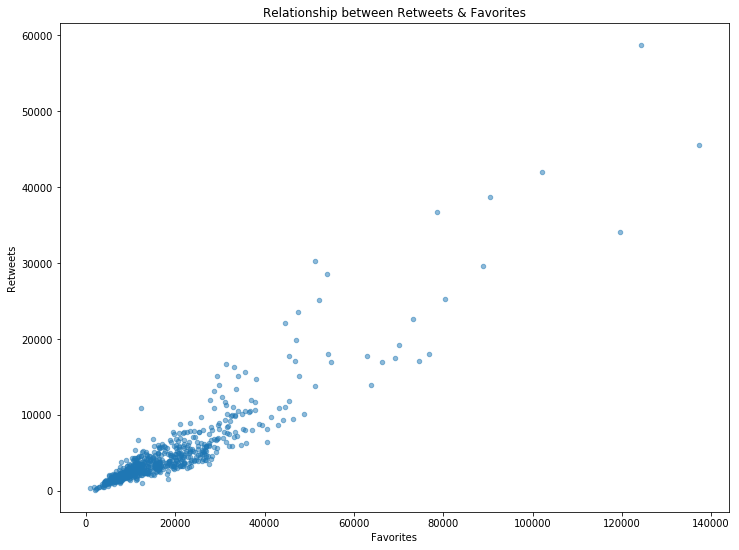

In [371]:
#plot the relationship
x = master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5)
x.grid(False)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Relationship between Retweets & Favorites')
plt.savefig('RetweetVsFavorite.png')

#### 2. Insight.

The number of times a tweet was favorited and the number of times it was reposted are in very strong positive correlation. Which means that if tweet was liked it will most likely be reposted.

### 3. Most popular bog names and breeds 

In [310]:
df_breeds = master[master['breed']!= 'None']

In [327]:
df_breeds

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,13.0,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,7980,37248
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,13.0,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,5926,32028
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,12.0,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,3913,24132
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,13.0,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,8135,40574
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,12.0,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,8813,38800
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,nameless,13.0,None,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,2932,19495
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,nameless,13.0,None,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,17778,62847
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,13.0,None,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,4032,26822
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,14.0,doggo,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,6944,30726
10,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,13.0,None,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,6904,29557


In [316]:
most_10_breeds = df_breeds.breed.value_counts().head(10)
most_10_breeds

chihuahua                   39
pug                         33
golden_retriever            31
labrador_retriever          29
toy_poodle                  22
pembroke                    21
pomeranian                  17
shih-tzu                    13
chesapeake_bay_retriever    12
samoyed                     12
Name: breed, dtype: int64

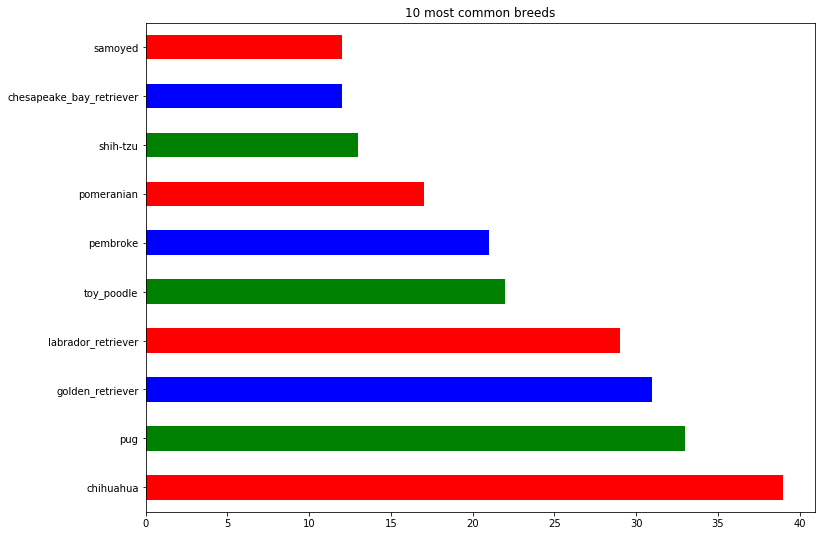

In [396]:
most_10_breeds.plot(kind = 'barh', color=['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b']);
plt.title('10 most common breeds')
plt.savefig('most10breeds.png')

In [321]:
df_names = master[master['name']!= "nameless"]
most_10_names = df_names.name.value_counts().head(10)
most_10_names

Charlie    6
Penny      5
Tucker     5
Daisy      4
Bo         4
Winston    4
Stanley    4
Cooper     4
Bailey     4
Rusty      3
Name: name, dtype: int64

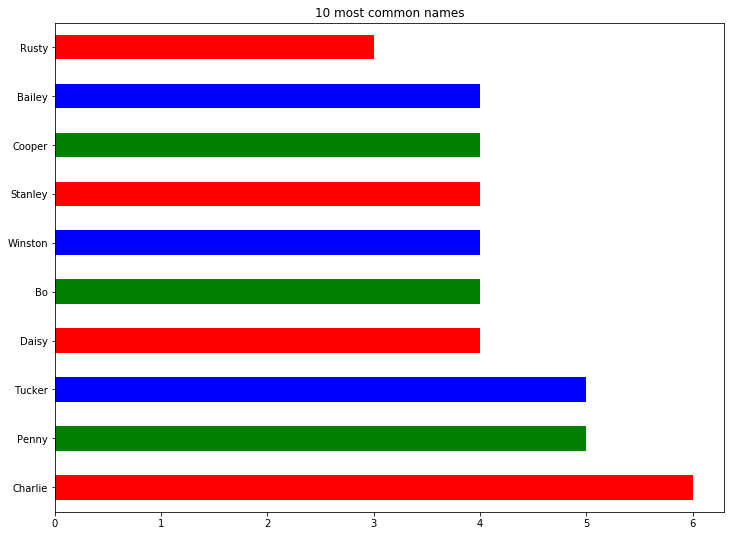

In [397]:
most_10_names.plot(kind = 'barh', color=['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b']);
plt.title('10 most common names')
plt.savefig('most10names.png')

In [331]:
#generate wordclouds for breeds and names
#Reference: https://www.datacamp.com/community/tutorials/wordcloud-python
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


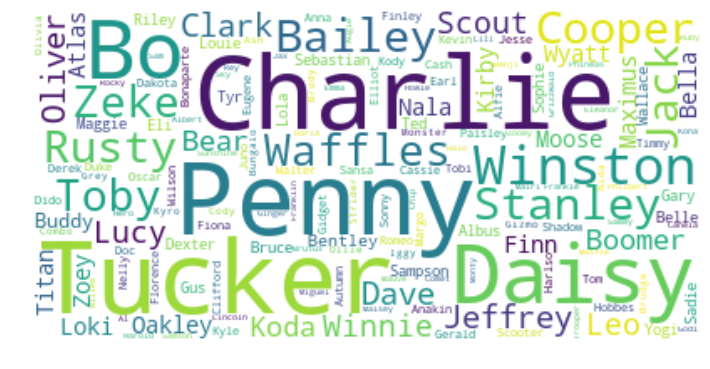

In [373]:
#create list of names 
name_list = df_names['name'].value_counts().index.tolist()

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=60, max_words=200, background_color="white").generate(' '.join(name_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("namecloud.png")

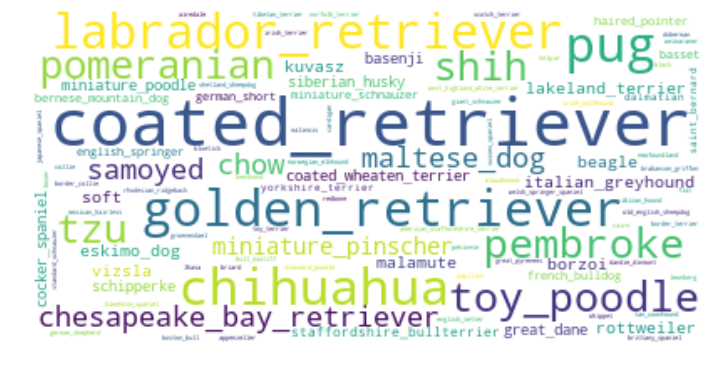

In [374]:
#create list of breeds 
breed_list = df_breeds['breed'].value_counts().index.tolist()

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=70, max_words=300, background_color="white").generate(' '.join(breed_list))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("breedcloud.png")

### 4. Rating according to breed
>Which dog breed got the highest rating?

In [358]:
df_breeds_mean = df_breeds.groupby('breed').mean()
df_breeds_mean.rating.sort_values(ascending = False)

breed
irish_water_spaniel               13.000000
tibetan_terrier                   13.000000
gordon_setter                     13.000000
newfoundland                      13.000000
groenendael                       13.000000
border_terrier                    13.000000
standard_schnauzer                13.000000
norwegian_elkhound                13.000000
leonberg                          13.000000
sussex_spaniel                    13.000000
black-and-tan_coonhound           13.000000
curly-coated_retriever            13.000000
walker_hound                      13.000000
doberman                          13.000000
welsh_springer_spaniel            13.000000
blenheim_spaniel                  13.000000
soft-coated_wheaten_terrier       12.833333
miniature_poodle                  12.800000
basset                            12.800000
american_staffordshire_terrier    12.750000
lakeland_terrier                  12.625000
beagle                            12.555556
pomeranian                

### 5. Dog stage repartition
>How many are there of each dog type?

In [379]:
#count the number of each dog type 
partition = master[master['dog_stage'] != "None"]
partition = partition.dog_stage.value_counts()
partition

doggo      49
pupper     46
puppo      17
floofer     4
Name: dog_stage, dtype: int64

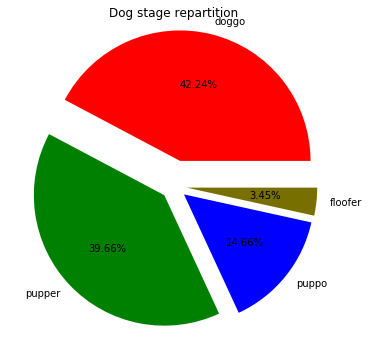

In [395]:
#create pie chart
partition.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(6,6), explode=(0.2, 0.1, 0.1, 0.1),colors = ['r', 'g', 'b','#777000'])
plt.ylabel('')
plt.title('Dog stage repartition')
plt.savefig('DogStages.png')